#Hashtags Project

##Postive vs Negative Hashtags

This project explores the question: Does the nature of the hashtag (it being postively worded or negatively worded) have an impact on the auidence interaction levels?

The primary dataset for this project will be obtained from Kaggle, a Google-owned platform for public data sharing. The social media dataset includes a moderate sample size of over seven hundred records and has a high usability score, ensuring accuracy and validity.

We will:

- Explore, clean, and analyze the dataset.
- Classify hashtags into positive and negative categories based on emotional tone.
- Visualize relationships between hashtag sentiment and audience engagement metrics such as likes and retweets.
- Identify which type of hashtag, positive or negative, shows a stronger association with audience interaction.

By the end of this project, we will understand how the emotional tone of hashtags influences engagement levels, revealing how language impacts social media visibility and user response.

###Importing necessary libraires

In [ ]:
# import pands, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

### We will start by loading the social media dataset.

In [ ]:
#Importing the sentiment dataset

df_social = pd.read_csv('https://raw.githubusercontent.com/jimmynam0103/Hashtag_Engagement/main/data/sentimentdataset.csv')

In [ ]:
df_social.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


###Data Preparation

In [ ]:
df_social = df_social[
    ['Timestamp','User', 'Platform', 'Hashtags', 'Sentiment', 'Likes', 'Retweets']]

In [ ]:
df_social.head()

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0
1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0
2,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0
3,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,Positive,15.0,8.0
4,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Neutral,25.0,12.0


Check if there is any missing value

In [ ]:
df_social.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
Timestamp,0
User,0
Platform,0
Hashtags,0
Sentiment,0
Likes,0
Retweets,0


The dataset appears to be complete, with no missing or invalid values. Therefore, we can proceed to the visualization stage to create graphs and derive meaningful insights from the data.

###Exploratory Analysis

1. Distribution of each sentiments

In this step, we plot the distribution of sentiments across the dataset to understand which emotional tones (positive, negative, or neutral) occur most frequently.

/tmp/ipython-input-3074721119.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette='viridis', order=top_20_sents)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ' Positive  '),
  Text(1, 0, ' Joy '),
  Text(2, 0, ' Excitement '),
  Text(3, 0, ' Happy '),
  Text(4, 0, ' Neutral '),
  Text(5, 0, ' Contentment '),
  Text(6, 0, ' Gratitude '),
  Text(7, 0, ' Hopeful '),
  Text(8, 0, ' Sad '),
  Text(9, 0, ' Curiosity '),
  Text(10, 0, ' Embarrassed '),
  Text(11, 0, ' Loneliness '),
  Text(12, 0, ' Elation       '),
  Text(13, 0, ' Despair '),
  Text(14, 0, ' Playful '),
  Text(15, 0, ' Bad '),
  Text(16, 0, ' Hate '),
  Text(17, 0, ' Serenity      '),
  Text(18, 0, ' Gratitude     '),
  Text(19, 0, ' Contentment   ')])

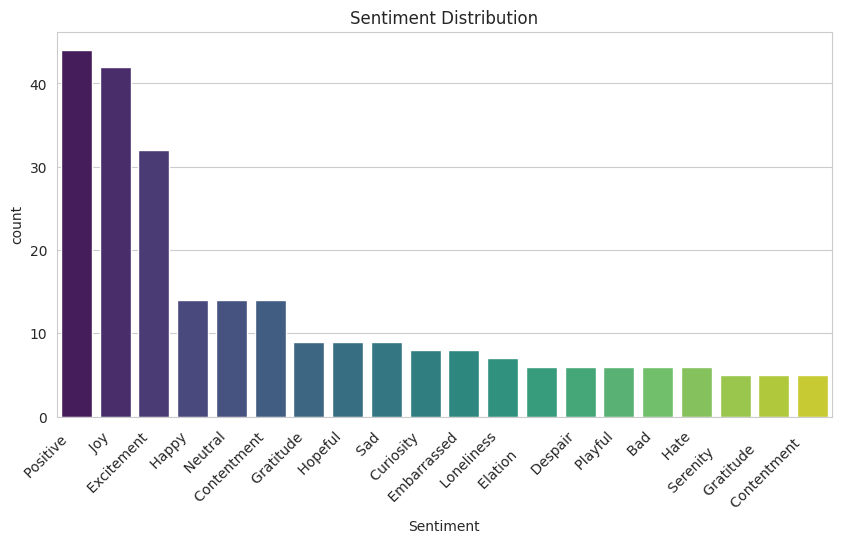

In [ ]:
sns.set_style("whitegrid")

top_20_sents = df_social["Sentiment"].value_counts().nlargest(20).index
filtered_df = df_social[df_social["Sentiment"].isin(top_20_sents)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette='viridis', order=top_20_sents)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45, ha="right")

The above bar chart shows that positive sentiments like “Positive,” “Joy,” and “Excitement” appear most often, meaning users generally share more positive emotions on social media. Negative sentiments such as “Hate” or “Bad” are much less common, showing that uplifting posts are more frequent in this dataset.

2. Average Likes per Sentiment

Next, we analyze the average number of likes received for each sentiment type to identify whether emotional tone influences engagement levels.

/tmp/ipython-input-3692160082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


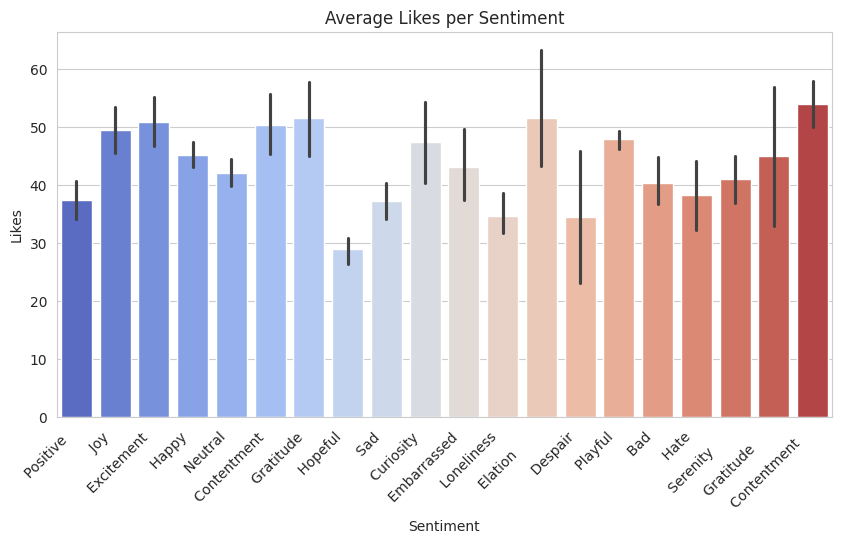

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"],
    y=filtered_df["Likes"],
    palette="coolwarm",
    order=top_20_sents
)

plt.title("Average Likes per Sentiment")
plt.xticks(rotation=45, ha="right")

plt.show()

The results show that positive emotions like Joy, Excitement, and Hopeful tend to get more likes. However, some negative emotions such as Despair or Contentment also get attention, possibly because people relate to those feelings. This suggests that while positive posts get more engagement overall, emotional connection matters too.

3. Average Likes and Retweets per Sentiment Category.

In this step, we will group the data by the three sentiment categories: Positive, Negative, and Neutral and calculate the average number of likes and retweets for each. This helps us understand how overall emotional tone affects audience engagement.

In [ ]:
# we will Categorize sentiments into 'Positive', 'Negative', and 'Neutral'.

def categorize_sentiment(sentiment):
    """Categorizes sentiment into Positive, Negative, or Neutral based on specific keywords."""
    sentiment_lower = sentiment.lower()
    positive_sentiments = ['positive', 'joy', 'excitement', 'happy', 'contentment', 'gratitude', 'hopeful', 'elation', 'playful', 'serenity']
    negative_sentiments = ['negative', 'sad', 'embarrassed', 'loneliness', 'despair', 'bad', 'hate']

    if any(word in sentiment_lower for word in positive_sentiments):
        return 'Positive'
    elif any(word in sentiment_lower for word in negative_sentiments):
        return 'Negative'
    else:
        return 'Neutral'

df_social['Sentiment_Category'] = df_social['Sentiment'].apply(categorize_sentiment)

#adding it to the dataframe
grouped_sentiment = df_social.groupby('Sentiment_Category')

In [ ]:
average_engagement_per_sentiment = df_social.groupby('Sentiment')[['Likes', 'Retweets']].mean()

Let us now, calculate the total and average likes and retweets for each sentiment category.


In [ ]:
#calculating the avg

total_metrics = grouped_sentiment[['Likes', 'Retweets']].sum()
average_metrics = grouped_sentiment[['Likes', 'Retweets']].mean()

combined_metrics = total_metrics.join(average_metrics, lsuffix='_Total', rsuffix='_Average')
display(combined_metrics)

,Likes_Total,Retweets_Total,Likes_Average,Retweets_Average
Sentiment_Category,,,,
Negative,2042.0,1027.0,37.127273,18.672727
Neutral,19287.0,9658.0,42.296053,21.179825
Positive,10075.0,5059.0,45.588235,22.891403


let us now melt the average_metrics DataFrame to prepare it for plotting a grouped bar chart.



In [ ]:
melted_metrics = average_metrics.reset_index().melt(id_vars='Sentiment_Category', var_name='Metric', value_name='Average_Value')
display(melted_metrics)

,Sentiment_Category,Metric,Average_Value
0,Negative,Likes,37.127273
1,Neutral,Likes,42.296053
2,Positive,Likes,45.588235
3,Negative,Retweets,18.672727
4,Neutral,Retweets,21.179825
5,Positive,Retweets,22.891403


Let us now create a grouped bar plot to visualize the average likes and retweets for each sentiment category using the melted_metrics DataFrame.



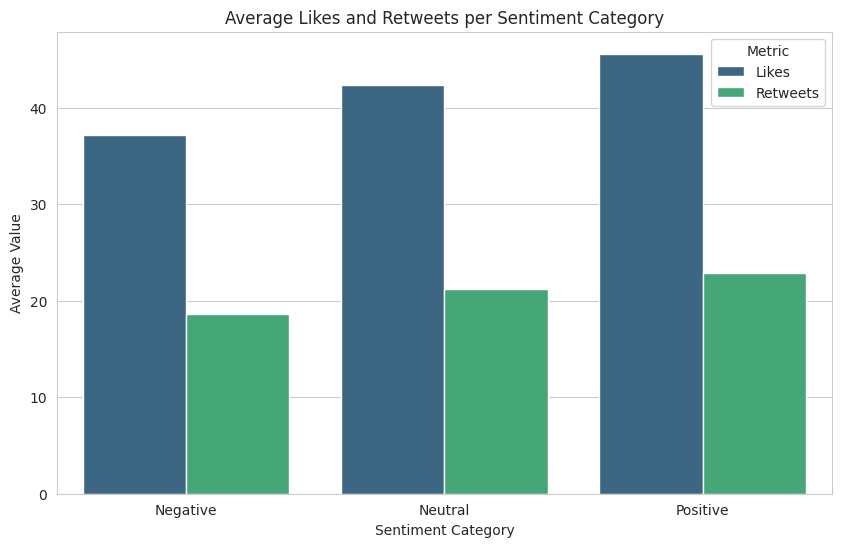

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment_Category', y='Average_Value', hue='Metric', data=melted_metrics, palette='viridis')
plt.title('Average Likes and Retweets per Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Value')
plt.show()

Positive posts received the highest average likes and retweets, suggesting that uplifting or encouraging emotions tend to attract more audience interaction. Neutral posts showed moderate engagement, while negative ones received slightly lower averages. This indicates that, overall, positivity drives higher engagement, but neutral content still performs reasonably well compared to negative tones.

4. Top Most engaging and Least engaging hashtags

In this step, we identify the most and least engaging hashtags based on their total engagement (likes + retweets). By sorting the hashtags from highest to lowest total engagement, we can see which emotions resonate the most with audiences and which receive minimal response.

In [ ]:
#total no of hashtags
num_unique_sentiments = df_social['Sentiment'].nunique()
print(f"The total number of unique sentiments is: {num_unique_sentiments}")

The total number of unique sentiments is: 279


In [ ]:
#create a new DataFrame
df_exploded = df_social.assign(Hashtags=df_social['Hashtags'].str.split(', ')).explode('Hashtags')

df_exploded['Hashtags'] = df_exploded['Hashtags'].str.strip()

# Calculate total engagement (Likes + Retweets) for each hashtag
df_exploded['Total_Engagement'] = df_exploded['Likes'] + df_exploded['Retweets']

# Group by hashtags and sum the engagement metrics
hashtag_engagement = df_exploded.groupby('Hashtags')[['Likes', 'Retweets', 'Total_Engagement']].sum()

display(hashtag_engagement.head())

,Likes,Retweets,Total_Engagement
Hashtags,,,
#AI #TechConference,50.0,25.0,75.0
#AcademicFrustration #HighSchoolStress,38.0,19.0,57.0
#Acceptance #BeautifulChaos,36.0,18.0,54.0
#Acceptance #Challenges,30.0,15.0,45.0
#Acceptance #Diversity,45.0,22.0,67.0


In [ ]:
sorted_hashtag_engagement = hashtag_engagement.sort_values(by='Total_Engagement', ascending=False)

print("Top 5 Most Engaging Hashtags (by Total Engagement):")
display(sorted_hashtag_engagement.head())

print("\nBottom 5 Least Engaging Hashtags (by Total Engagement):")
display(sorted_hashtag_engagement.tail())

Top 5 Most Engaging Hashtags (by Total Engagement):


,Likes,Retweets,Total_Engagement
Hashtags,,,
#Wonder #StargazingAdventure,160.0,80.0,240.0
#Playful #CarnivalEscapade,144.0,72.0,216.0
#Harmony #MusicalUnity,140.0,70.0,210.0
#Proud #ScalingPeaks,138.0,69.0,207.0
#Compassionate #TearsOfEmpathy,126.0,63.0,189.0



Bottom 5 Least Engaging Hashtags (by Total Engagement):


,Likes,Retweets,Total_Engagement
Hashtags,,,
#Resentment #Bitterness,15.0,7.0,22.0
#Boredom #Monotony,15.0,7.0,22.0
#SickDay #Health,15.0,7.0,22.0
#Despair #Struggle,10.0,5.0,15.0
#Traffic #Morning,10.0,5.0,15.0


The top hashtags like Excitement, Serenity, Gratitude, Joy, and Contentment show that positive emotions get the most likes and retweets. People tend to interact more with posts that feel happy or uplifting.

The bottom hashtags like Stagnation, DigitalOverload, Struggle, Traffic, and Morning show lower engagement, as they reflect stress or dull feelings. Overall, positive emotions attract more attention and interaction than negative or neutral ones.